# Statistics Refresher

## Types of variables

- Categorical
    - Nominal (Gender, Marital Status)
    - Ordinal (Letter Grade)
- Quantitative: 
    - Continuous (Height, Age, Income)
    - Discrete (Pages in Book, Trees in Yard)

## Descriptive Statistics

Mean: 
$$\bar{x} = \frac{1}{n} \sum_{i=1}^{n}{x_i}$$

Variance: 
$$Var(X) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^{2} $$

Standard Deviation:
$$\sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^{2}} $$

## Distribution Shapes

- Left-skewed - most of the data is on the RIGHT  
    - mean < median
    - examples: GPA, age of death, prices
    - better to use 5-number summary
- Right-skewed - most of the data is on the LEFT:
    - mean > median
    - examples: human wealth, athletic abilities
    - better to use 5-number summary
- Normal 
    - mean = median = mode
    - mean and SD give the most information

## Basic definitions

- Population - our entire group of interest.  
- Parameter - numeric summary about a population  
- Sample - subset of the population  
- Statistic numeric summary about a sample

## Normal Distribution 

$$f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{{- \frac{1}{2} * \frac{(x-\mu)^2}{2 \sigma^2}}} $$

## Sampling Distribution

A sampling distribution is the distribution of a statistic. Example: take n samples from population. Average each, this will be a sampling distribution.

<b>Mean:</b>   
Parameter - $\mu$, statistic - $\bar{x}$, $\hat{\mu}$   
<b>Standard deviation:</b>     
Parameter - $\sigma$, statistic - $S$, $\hat{\sigma}$  
<b>Proportion:</b>  
Parameter - $\pi$, statistic - $p$, $\hat{\pi}$  
<b>Regression coefficient:</b>  
Parameter - $\beta$, statistic - $b$, $\hat{\beta}$

## Law of Large Numbers

As our sample size increases, the sample mean gets closer to the population mean.  
Methods: Maxiumum Likelihood Estimation, Method of Moments Estimation, Bayesian Estimation

## Central Limit Theorem

With a large enough sample size the sampling distribution of the mean will be normally distributed.  
CLT applies to: 
- sample means ($\bar{x}$)  
- sample proportions ($p$)  
- difference in sample means ($\hat{x_1}-\hat{x_2}$  
- difference in sample proportions ($p_1 - p_2$)  

Doesn't apply to: $S^2$, r (correlation coefficient), $x_n$ (maximum number)

### CLT Example: 

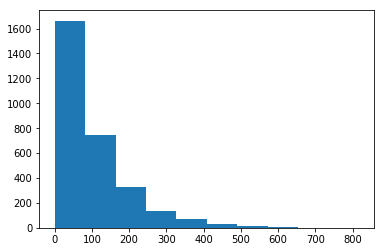

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

pop_data = np.random.gamma(1,100,3000)
plt.hist(pop_data);

In [2]:
means_size_100 = np.array([])
for i in range(10000):
    mean = np.random.choice(pop_data, 100).mean()
    means_size_100 = np.append(means_size_100, mean)

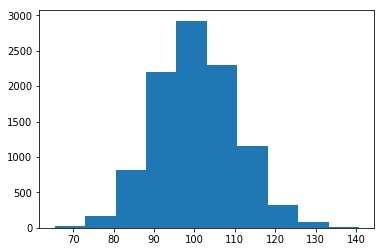

In [3]:
plt.hist(means_size_100);

In [4]:
pop_data.mean()

100.35978700795846

In [5]:
means_size_100.mean()

100.45928252074191

## Bootstrapping

Bootstrapping (statistics) - sampling with replacement. Random.choice samples with replacement. 
<a href="https://stats.stackexchange.com/questions/26088/explaining-to-laypeople-why-bootstrapping-works">additional info</a> 
In Python bootstrapping is performed as follows: 

In [6]:
sample_size = 200
sample = pd.DataFrame(pop_data).sample(sample_size, replace=True)

## Confidence Intervals with Bootstrapping

Traditional methods for hypothesis testing at <a href="https://stattrek.com/hypothesis-test/hypothesis-testing.aspx">StatTrek</a>

The interval that "captures" the value of the parameter with some probability. For example, we're interested in 95% confidence interval (i.e. the parameter is within this interval with 95% probability.  

### Confidence interval for the mean. 
The process (with bootstrapping): 
- Take N (where N is some large number) samples from the sample (with replacement) 
- Take the means of these samples (and aggregate into an array)  
- We expect these sample means to have normal distribution 
- Take the value for the 2.5th percentale and 97.5th percentile. 
- These are the ends of the confidence interval 

In Python it can be done as follows: 

In [7]:
original_sample = pd.DataFrame(pop_data).sample(200) # create a sample to imitate getting data from real world
# create sampling distribution
means = []
for _ in range(10000):
    samp = original_sample.sample(200, replace=True)
    means.append(samp.mean())
means = np.array(means)

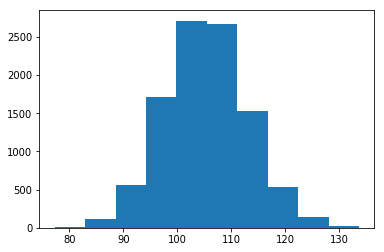

In [8]:
plt.hist(means);

In [9]:
np.percentile(means, 2.5), np.percentile(means, 97.5)

(90.9000826902922, 120.8399790996834)

Same procedure implemented with traditional methods in Python:

In [10]:
import statsmodels.stats.api as sms
sms.DescrStatsW(original_sample).tconfint_mean()

(array([90.2532154]), array([120.66155991]))

OR:

In [11]:
sms.zconfint(original_sample)

(array([90.34568039]), array([120.56909492]))

Actual value for the entire population was (and we can see it's withing the interval!):

In [12]:
pop_data.mean()

100.35978700795846

### Confidence interval for the difference of means

Almost the same as the confidence interval for the mean. However, the conclusion is different. If the resulting interval doesn't contain zero, we suggest that there was a difference: we are 95% confident that the difference is within the obtained interval. 

Application example: compare the average life span for smokers and non-smokers. 

Traditional methods: 

<code>cm = statsmodels.stats.api.CompareMeans(sms.DescrStatsW(x1), sms.DescrStatsW)  
cm.tconfint_diff(usevar='unequal')
</code> 


## Practical and Statistical Significance

Statistical Significance - evidence from hypothesis tests and confidence intervals that $H_1$ is true.   
Practial Significance - considers real world aspects, not just numbers in making final conclusions  

Statistical significance is higher with large sample size. 

## Hypothesis Testing
Hypothesis Testing and Confidence Intervals are related techniques. A 95% confidence interval will draw the same conclusions as a hypothesis test with a type I error rate of 0.05 in terms of which hypothesis to choose, because:
$1-0.95 = 0.05$
assuming that the alternative hypothesis is a two sided test.

$H_0$ - null-hypothesis. A condition we believe to be true before we collect the data.  

$H_0$ and $H_1$ should be competing and <b>non-overlapping</b> hypotheses. 

$H_1$ is what we want to prove to be true  

$H_0$ usually uses $=, <=, >=$, while $H_1$ uses $\neq, >, <$

### Example 1

We want to check if the new page drives more traffic. Then: 
$$H_1: \mu_{new} > \mu_{old}$$
$$H_0: \mu_{new}  <= \mu_{old}$$


<b>Type I Error (aka False Positive - $\alpha$) </b>: alternative is chosen, but the null is actually true.  
<b>Type II Error (aka False Negative - $\beta$) </b>: null is chosen, but the alternative is actually true.  
Type I Error is considered to be worse than Type II Error

Common practice: set threshold for Type I errors and they try to make the level of Type II Error as low as possible. 
<b>Typial thresholds:</b>  
- In Business and Research: $\alpha = 0.05$
- In Medicine: $\alpha = 0.01$

### Example 2

We would like to check if the average height of the population (!) is greater than 70 inches. 

In [13]:
df = pd.read_csv('data/coffee_dataset.csv')

$$H_0: \mu <= 70$$
$$H_1: \mu > 70$$

In [14]:
sample_df = df.sample(150)

In [15]:
means = []
for _ in range(10000):
    bootsample = sample_df.sample(150, replace=True)
    means.append(bootsample.height.mean())    

#### Approach 1: Hypothesis Testing

In [16]:
low, high = np.percentile(means, 2.5), np.percentile(means, 97.5)

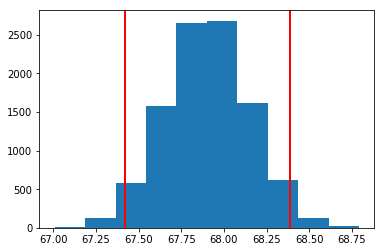

In [17]:
plt.hist(means);
plt.axvline(low, color='r', linewidth=2);
plt.axvline(high, color='r', linewidth=2);

We suggest that $H_0$ is true since 70 is completely out of the interval. 

#### Approach 2: Simulating a sampling distribution

The idea is to simulate the distribution from the closes value that is still in the null space. In our case - 70

In [18]:
np.std(means)

0.2457793894721801

We expect that the mean follows the normal distribution. So we are going to simulate it:

In [19]:
null_vals = np.random.normal(70, np.std(means), 10000)

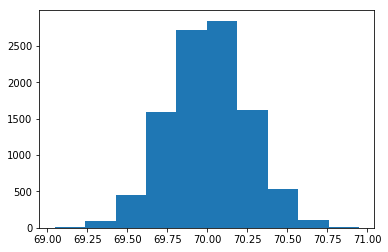

In [20]:
plt.hist(null_vals);

In [21]:
sample_df.height.mean()

67.90329853936709

Hence, $H_0$ is true (we can't reject it!). However, if the $H_0$ was that $\mu=70$, we would have been able to reject it. 

## p-value

p-value is the probability of observing the statistic (or one more extreme value in favor of the alternative) if the null hypothesis is true. The shaded area under the curve is the area we need to calculate to get the p-value.

<p><img src="pvalue.jpg" width="600" align='left'></p>
Source: Udacity

<a href=https://rebeccaebarnes.github.io/2018/05/01/what-is-a-p-value>Explanation of p-value with examples</a> 

The process:

- Simulate the values of your statistic that are possible from the null (as shown in Approach 2).  
- Calculate the value of the statistic you actually obtained in your data (in the sample).
- Compare your statistic to the values from the null.
- Calculate the proportion of null values that are considered extreme based on your alternative.

Small p-value - it's not likely that the it's from the null hypothesis distribution. Typical value for comparison is 0.05. If the p-value is large, it means that it's very likely that the null hypothesis is true. 
The p-value threshold depends of how large Type I Error we can afford. So if we set $\alpha = 0.05$, then the p-value should be $\leq 0.05$.  
General rule:  
If $\text{p-value } \leq \alpha \implies \text{reject } H_0$  
Else: can't reject $H_0$

### Example
Dataset: coffee

In [22]:
full_data = pd.read_csv('data/coffee_dataset.csv')

Null hypothesis: 
$$H_0: \mu = 67.60$$
$$H_1: \mu \neq 67.60$$

In [23]:
null_mu = 67.60

Step by step implementation:   
<b>Step 1: Take 1 sample and create sampling distribution</b>

In [24]:
np.random.seed(42)
sample1 = full_data.sample(5)

In [25]:
means = []
for _ in range(10000):
    means.append(full_data.sample(5).height.mean())

<b>Step 2: Find the standard deviation of the sampling distribution</b> 

In [26]:
sampling_std = np.std(means)

<b>Step 3: Simulate mean values under the null hypothesis</b> 

In [27]:
null_vals = np.random.normal(null_mu, sampling_std,10000)

<b>Step 4: Define boundaries</b> 

In [28]:
low_ext = (null_mu - (sample1.height.mean() - null_mu))  
high_ext = sample1.height.mean() 
low_ext, high_ext

(67.31765747950915, 67.88234252049084)

<b>Step 5: Calculate p-value as the % of the simulated data outside of this range</b>

In [29]:
((null_vals > high_ext).mean() + (null_vals < low_ext)).mean()

0.8376000000000002

<b>Step 6: Interpret the result</b>  
Since p-value is way above 0.05, we can't reject the null hypothesis.

<b>Important note:</b> as the sample gets large, even very small change appear to look significant which can be very misleading. As the sample grows large, the inverval becomes narrower and hence it's very easy to reject the null hypothesis which is not always correct.

## Multiple Hypothesis Tests

### Bonferroni Correction 

If we do multiple tests, Type I Error compounds. So we need to adjust it:   
New Type I Error rate = (error rate you want) / (number of tests).   
This is called the Bonferroni corrected rate. 

#### Other techniques: 
<a href="http://www.itl.nist.gov/div898/handbook/prc/section4/prc471.htm">Tukey correction</a>  
<a href="http://www.nonlinear.com/support/progenesis/comet/faq/v2.0/pq-values.aspx">Q-values</a> 